In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
train_dir = '/content/drive/MyDrive/newdataset/training'
test_dir = '/content/drive/MyDrive/newdataset/validation'

In [3]:
import os

total_train = 0

for i in os.listdir(train_dir):
  total_train += len(os.listdir(train_dir+'/'+i))
  print('Total File ', i, '=', len(os.listdir(train_dir+'/'+ i)))

print(total_train)

total_test = 0

for i in os.listdir(test_dir):
  total_test += len(os.listdir(test_dir+'/'+i))
  print('Total File ', i, '=', len(os.listdir(test_dir+'/'+ i)))

print(total_test)


total = 0
total = total_train + total_test
print('Total dataset = ', total)

Total File  freshapples = 463
Total File  freshcucumber = 477
Total File  freshoranges = 470
Total File  rottenbanana = 470
Total File  rottenapples = 479
Total File  rottenoranges = 470
Total File  rottencucumber = 470
Total File  freshbanana = 479
3778
Total File  rottencucumber = 120
Total File  rottenoranges = 120
Total File  freshbanana = 132
Total File  freshapples = 139
Total File  rottenapples = 141
Total File  freshcucumber = 135
Total File  freshoranges = 139
Total File  rottenbanana = 120
1046
Total dataset =  4824


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image (target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Ukuran gambar : {img.shape}")
  return img

Ukuran gambar : (442, 652, 3)


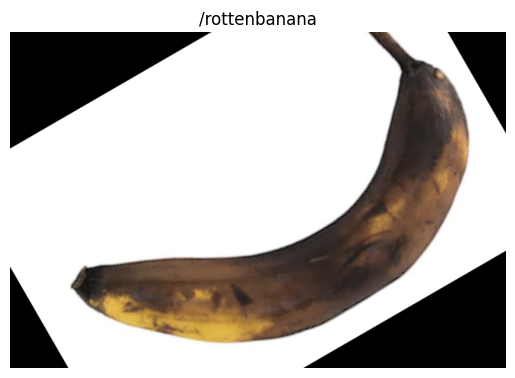

In [5]:
img = view_random_image (train_dir, '/rottenbanana')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
		rescale = 1./255,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,
		shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

validation_generator = validation_datagen.flow_from_directory(
	test_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

Found 3778 images belonging to 8 classes.
Found 1046 images belonging to 8 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers,models

base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(150, 150, 3))

base_model.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])

# Print the model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                           

In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [12]:
# Train the model
history = model.fit(train_generator,
                    epochs = 15,
                    validation_data = validation_generator)

Epoch 1/15
252/252 [==============================] - 1361s 5s/step - loss: 0.2446 - acc: 0.6231 - val_loss: 0.1112 - val_acc: 0.8690
Epoch 2/15
252/252 [==============================] - 57s 226ms/step - loss: 0.1154 - acc: 0.8632 - val_loss: 0.0837 - val_acc: 0.8862
Epoch 3/15
252/252 [==============================] - 60s 238ms/step - loss: 0.0824 - acc: 0.9116 - val_loss: 0.0716 - val_acc: 0.8872
Epoch 4/15
252/252 [==============================] - 60s 240ms/step - loss: 0.0680 - acc: 0.9269 - val_loss: 0.0630 - val_acc: 0.9111
Epoch 5/15
252/252 [==============================] - 61s 241ms/step - loss: 0.0559 - acc: 0.9407 - val_loss: 0.0604 - val_acc: 0.9082
Epoch 6/15
252/252 [==============================] - 59s 235ms/step - loss: 0.0502 - acc: 0.9457 - val_loss: 0.0608 - val_acc: 0.9159
Epoch 7/15
252/252 [==============================] - 57s 226ms/step - loss: 0.0442 - acc: 0.9545 - val_loss: 0.0533 - val_acc: 0.9226
Epoch 8/15
252/252 [==============================] - 56

In [41]:
model.save('modelmobilenetv2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
from google.colab import files

files.download('modelmobilenetv2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

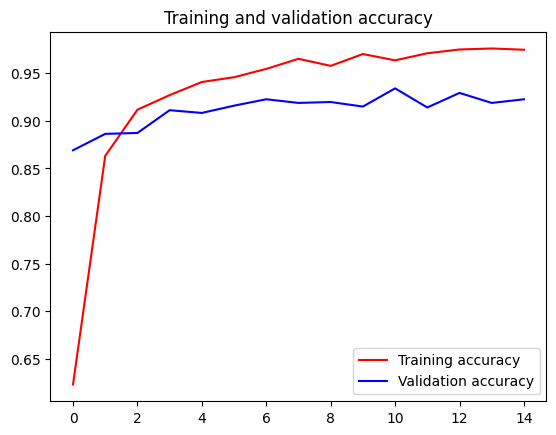

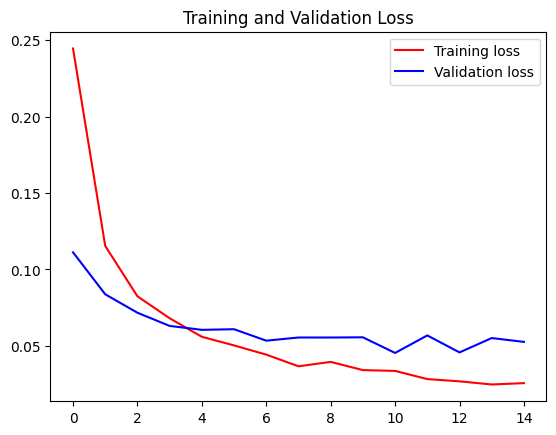

In [14]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)


plt.show()

In [67]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)

# Mengambil indeks kelas dengan nilai probabilitas tertinggi
predicted_class_index = np.argmax(arr)

# Daftar label yang sesuai dengan kelas
class_labels = [
    'Fresh Apples', 'Fresh Banana', 'Fresh Cucumber',
    'Fresh Oranges',
    'Rotten Apples', 'Rotten Banana', 'Rotten Cucumber',
    'Rotten Oranges'
]

# Menentukan label
predicted_label = class_labels[predicted_class_index]

# Menampilkan hasil prediksi
print('{} is a {}'.format(fn, predicted_label))

Saving banana11.jpg to banana11.jpg
1/1 [==============================] - 0s 36ms/step
banana11.jpg is a Fresh Cucumber
